# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Datasets/AFASTREM_022021.csv', sep=';', encoding='latin1')

## Data information

In [9]:
df.head(5)

,Nome,CPF,Descrição do cargo emprego,Nome do órgão de origem,UF da UPAG de vinculação,Cidade da residência,Nível escolaridade,Ano/Mês início afastamento,Ano/Mês referência,Valor rendimento liquido,Descrição do afastamento,
0,SONIA CANDIDA BATISTA ...,***086171**,CONTADOR,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",DF,BRASILIA,NS,201005,202102,"11540,22",CESSAO (COM ONUS) PARA OUTROS ORGAOS - EST ...,NaN
1,MARIA GRACI DA CONCEICAO MAXIMA ...,***803611**,AGENTE DE PORTARIA,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",DF,BRASILIA,NI,201703,202102,"5944,60",CESSAO (COM ONUS) PARA OUTROS ORGAOS - EST ...,NaN
2,DOMINGOS SAVIO RODRIGUES ...,***829911**,AGENTE ADMINISTRATIVO,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",DF,BRASILIA,NI,200705,202102,"6051,50",CESSAO (SEM ONUS) PARA OUTROS ORGAOS - EST ...,NaN
3,CLEUSA ADELAIDE MOREIRA MARINO ...,***530959**,AGENTE ADMINISTRATIVO,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",DF,BRASILIA,NI,200705,202102,"3168,98",CESSAO (SEM ONUS) PARA OUTROS ORGAOS - EST ...,NaN
4,NESTOR BATISTA DE OLIVEIRA ...,***197415**,AGENTE DE PORTARIA,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",DF,BRASILIA,NI,200705,202102,"6432,50",CESSAO (SEM ONUS) PARA OUTROS ORGAOS - EST ...,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120741 entries, 0 to 120740
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Nome                                                         120741 non-null  object 
 1   CPF                                                          120741 non-null  object 
 2   Descrição do cargo emprego                                   120741 non-null  object 
 3   Nome do órgão de origem                                      120741 non-null  object 
 4   UF da UPAG de vinculação                                     120741 non-null  object 
 5   Cidade da residência                                         120741 non-null  object 
 6   Nível escolaridade                                           113171 non-null  object 
 7   Ano/Mês início afastamento                                   1207

In [14]:
df.describe()

,Ano/Mês início afastamento,Ano/Mês referência,
count,120741.000000,120741.0,0.0
mean,201802.687140,202102.0,NaN
std,429.721761,0.0,NaN
min,198102.000000,202102.0,NaN
25%,201705.000000,202102.0,NaN
50%,202007.000000,202102.0,NaN
75%,202101.000000,202102.0,NaN
max,202102.000000,202102.0,NaN


In [15]:
df.columns

Index(['Nome', 'CPF', 'Descrição do cargo emprego', 'Nome do órgão de origem',
       'UF da UPAG de vinculação', 'Cidade da residência',
       'Nível escolaridade', 'Ano/Mês início afastamento',
       'Ano/Mês referência', 'Valor rendimento liquido',
       'Descrição do afastamento',
       '                                                           '],
      dtype='object')

# Exploration Data Analysis

### Quais orgãos Ferderais possuem a maior média Salarial por funcionarios Afastados?

In [17]:
df['Valor rendimento liquido'] = df['Valor rendimento liquido'].apply(lambda x: float(x.replace(',', '.')))

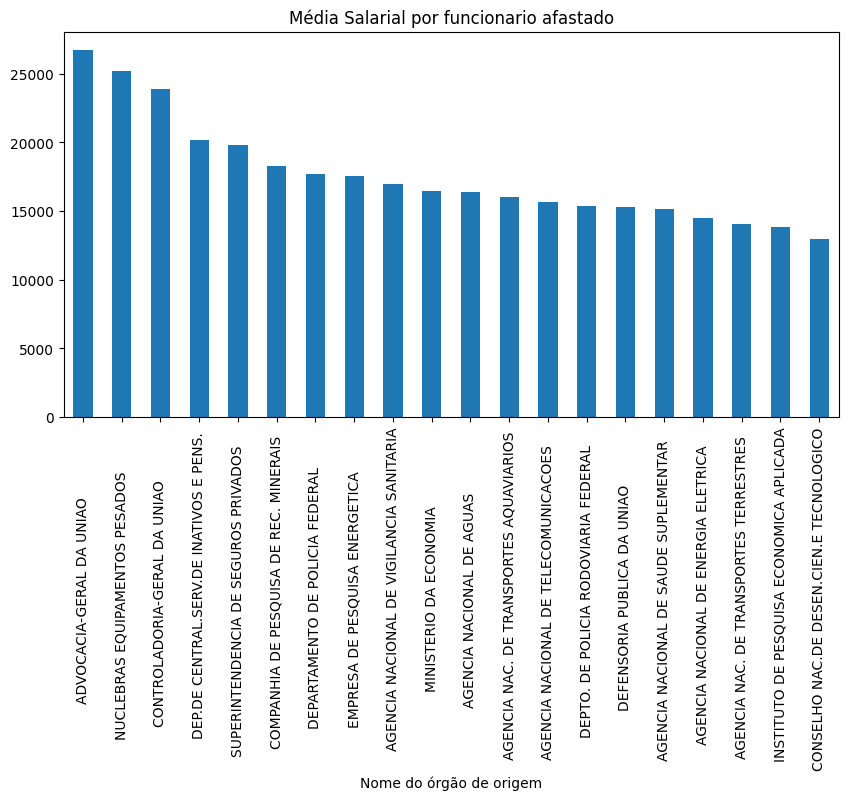

In [39]:
plt.rcdefaults()
plt.figure(figsize=(10,5))
plt.title('Média Salarial por funcionario afastado')
df.groupby('Nome do órgão de origem')['Valor rendimento liquido'].mean().sort_values(ascending=False)[:20].plot.bar();

### Quais orgãos Ferderais possuem a maior quantidade de funcionarios Afastados?

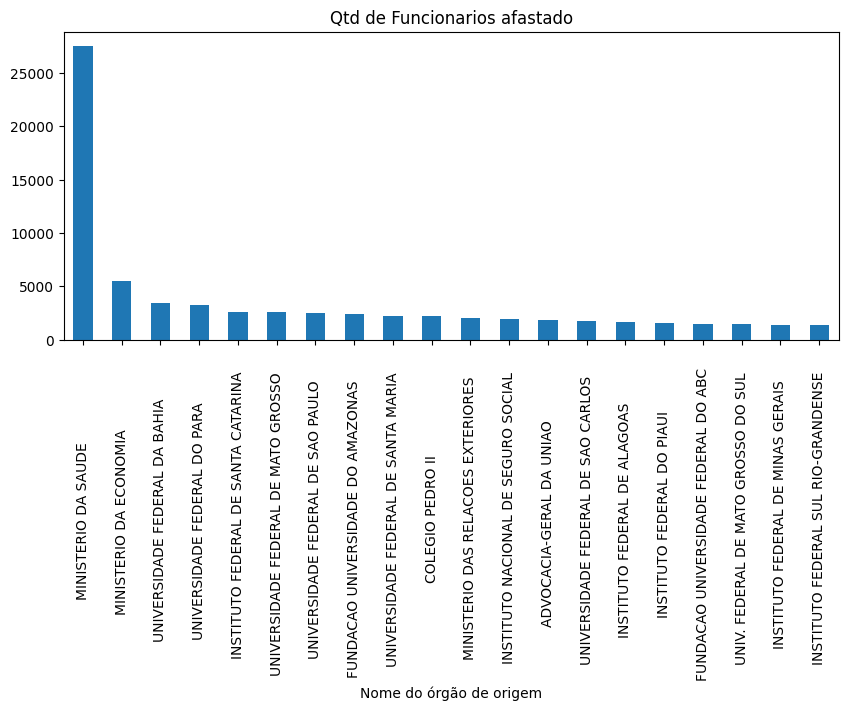

In [48]:
plt.figure(figsize=(10,4))
plt.title('Qtd de Funcionarios afastado')
df.groupby('Nome do órgão de origem')['Nome'].count().sort_values(ascending = False)[:20].plot.bar();

### Quais são os cargos com maior número de funcionarios afastados?

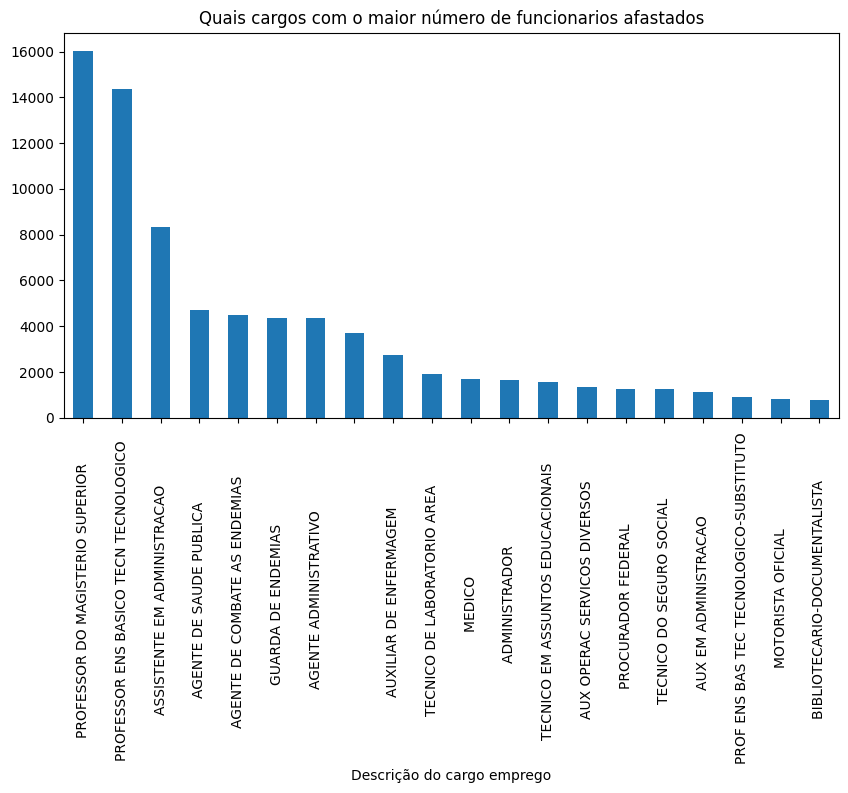

In [54]:
plt.figure(figsize=(10,5))
plt.title('Quais cargos com o maior número de funcionarios afastados')
df.groupby('Descrição do cargo emprego')['Nome'].count().sort_values(ascending=False)[:20].plot.bar();

### Quais os principais motivos de afastamento

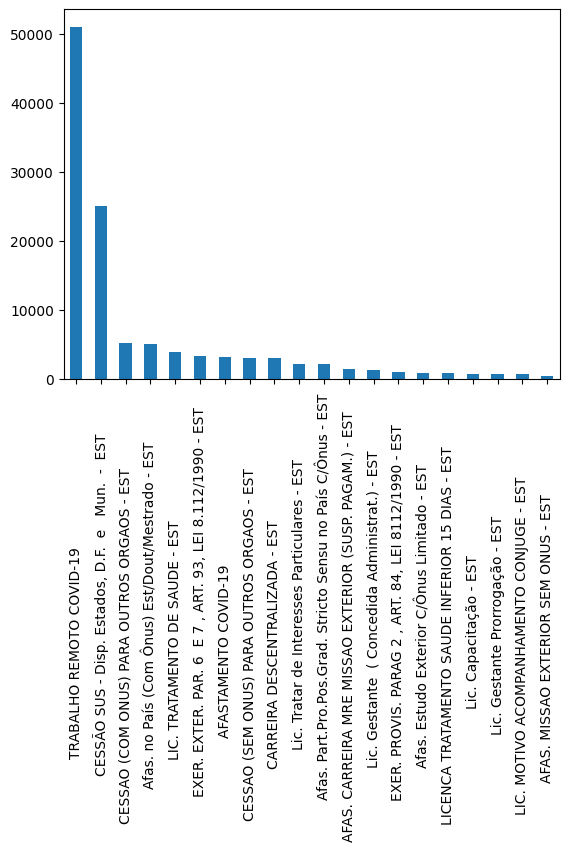

In [105]:
df['Descrição do afastamento'].value_counts()[:20].plot.bar();

### Em Qual Mês houve o maior número de pessoas afastadas? E qual foi o principal  motivo?

In [116]:
df['AnoMes'] = df['Ano/Mês início afastamento'].apply(lambda x: str(x))
data = df['AnoMes'].value_counts()[:10]
data

202102    28126
202101    15798
201009     8137
200908     6277
202003     6255
202012     4017
202007     3010
201902     2729
202008     2710
202010     2428
Name: AnoMes, dtype: int64

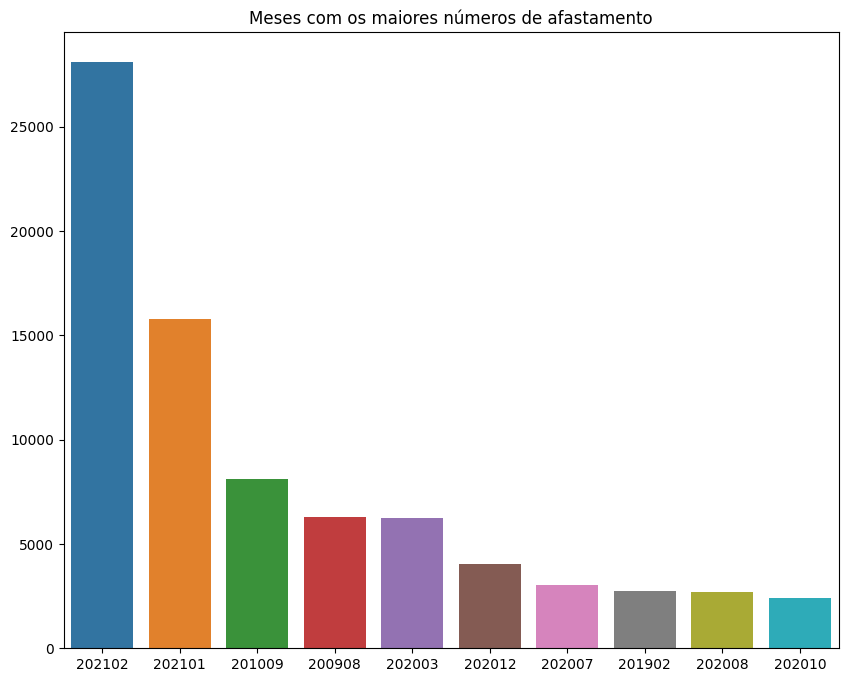

In [123]:
f, ax  = plt.subplots(figsize=(10,8))
sns.barplot(x=data.keys(), y=data.values, ax=ax);
plt.title('Meses com os maiores números de afastamento');

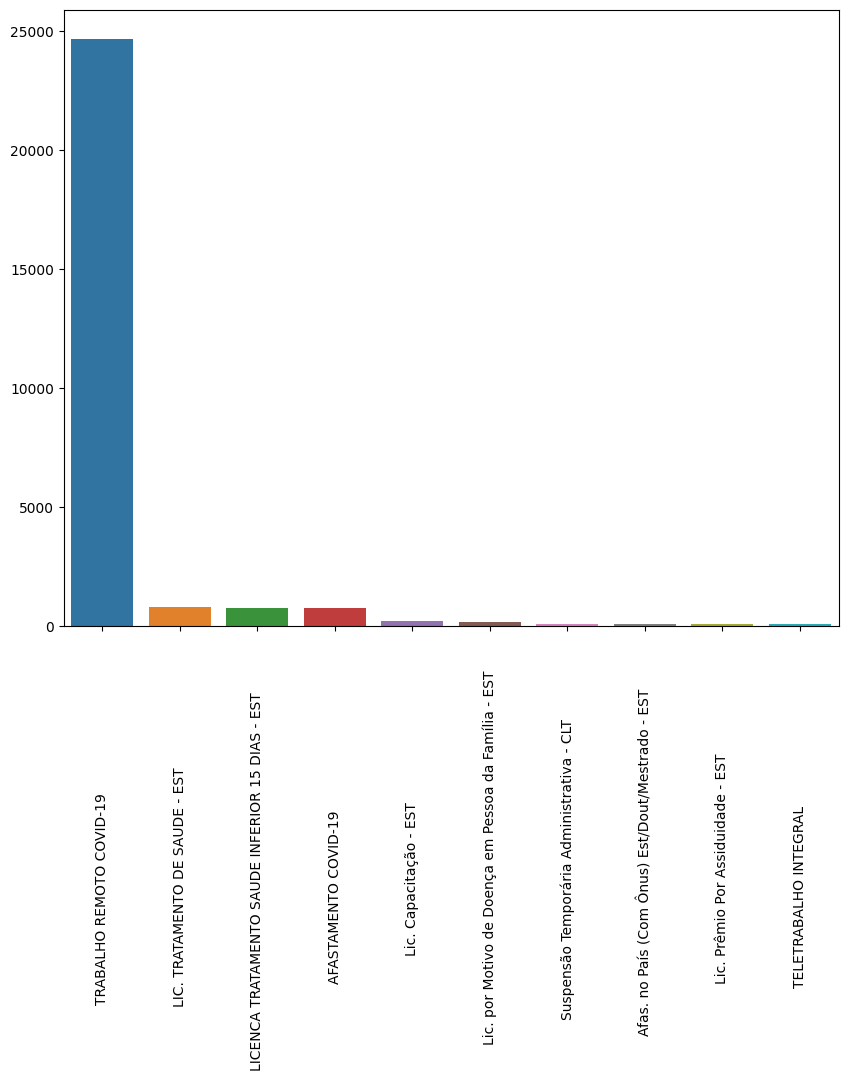

In [129]:
data = df[df['AnoMes'] == '202102']['Descrição do afastamento'].value_counts()[:10]
plt.figure(figsize=(10,8))
sns.barplot(x = data.keys(), y=data.values)
plt.xticks(rotation = 90)
plt.show()

### Qual é a quantidade e porcentagem de funcionarios com mais de 6 meses de afastamentos?

In [177]:
df['Data'] = df['Ano/Mês início afastamento'].appy(lambda x: x.su)

AttributeError: 'Series' object has no attribute 'appy'

In [178]:
df['Data Referencia'] = pd.to_datetime(df['Ano/Mês referência'].apply(lambda x: str(x)).str.slice(stop=4)+"-"+ df['Ano/Mês referência'].apply(lambda x: str(x)).str.slice(start=-2)+"-"+'01')
df['Data Afastamento'] = pd.to_datetime(df['AnoMes'].str.slice(stop=4)+"-"+ df['AnoMes'].str.slice(start=-2)+"-"+'01')
df['Meses Afastado'] = round((df['Data Referencia'] - df['Data Afastamento']) / np.timedelta64(1, "M"))

In [179]:
df[df['Meses Afastado'] > 6]['Nome'].count() / df.shape[0]

0.5245939655957794

In [180]:
df[df['Meses Afastado'] > 6]['Nome'].count()

63340